In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [23]:
refFilename = "form.jpg"
print("Reading Reference Image : ", refFilename)
im1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

imFilename = "scanned-form.jpg"
print("Reading Image to align : ",imFilename)
im2 = cv2.imread(imFilename, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

Reading Reference Image :  form.jpg
Reading Image to align :  scanned-form.jpg


Text(0.5, 1.0, 'Scanned Form')

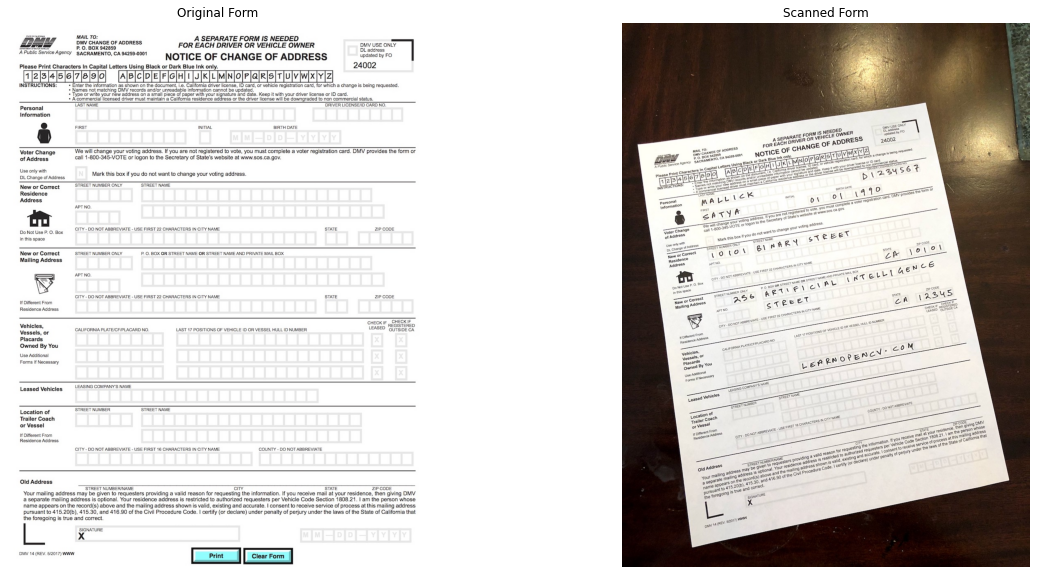

In [24]:
plt.figure(figsize=[20,10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("Scanned Form")


# Find KeyPoints

In [25]:
# Convert images to grayscale
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# Detect ORB features and compute descriptors
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray,None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray,None)

#display
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage = np.array([]), color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv2.drawKeypoints(im2, keypoints2, outImage = np.array([]), color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


Text(0.5, 1.0, 'Scanned Form')

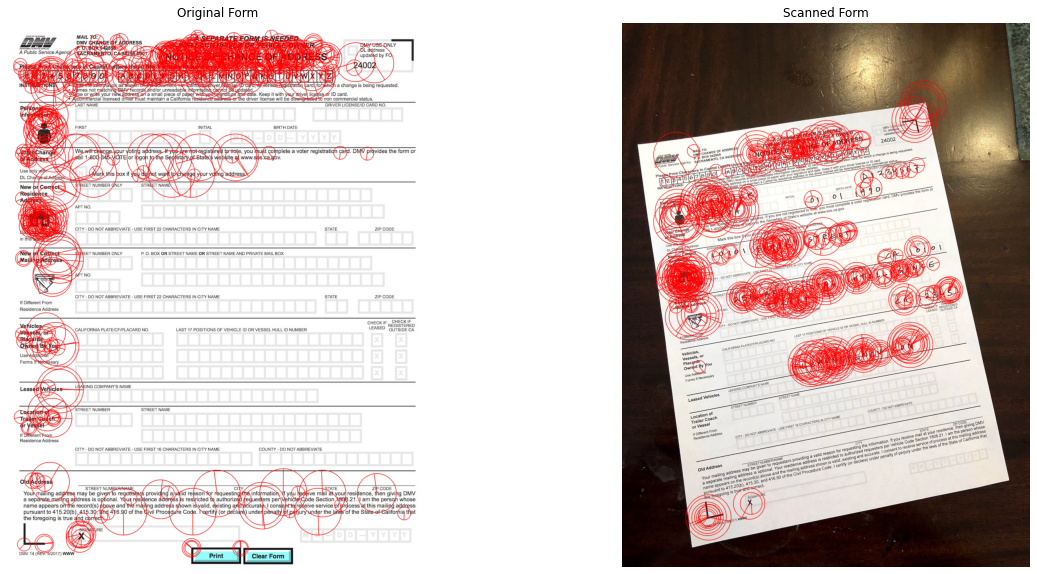

In [26]:
plt.figure(figsize=[20,10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form")


# Matching Keypoints

In [27]:
# match features
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None) 

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# remove no good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[: numGoodMatches]

Text(0.5, 1.0, 'original form')

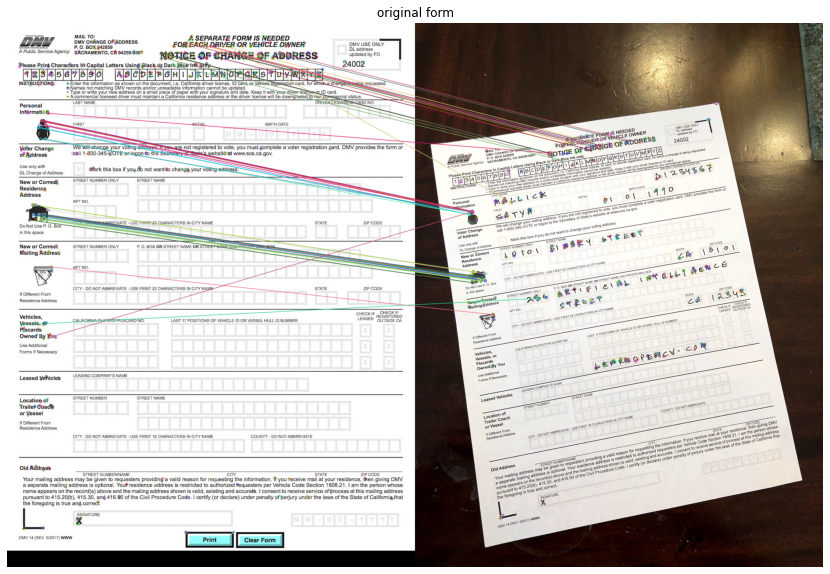

In [28]:
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=[40,10])
plt.imshow(im_matches); plt.axis('off'); plt.title("original form")

# Find Homography

In [31]:
# Extract location of Good matches
points1 = np.zeros((len(matches),2), dtype=np.float32)
points2 = np.zeros((len(matches),2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2,points1, cv2.RANSAC)

# Image Warping 

Text(0.5, 1.0, 'Scanned form')

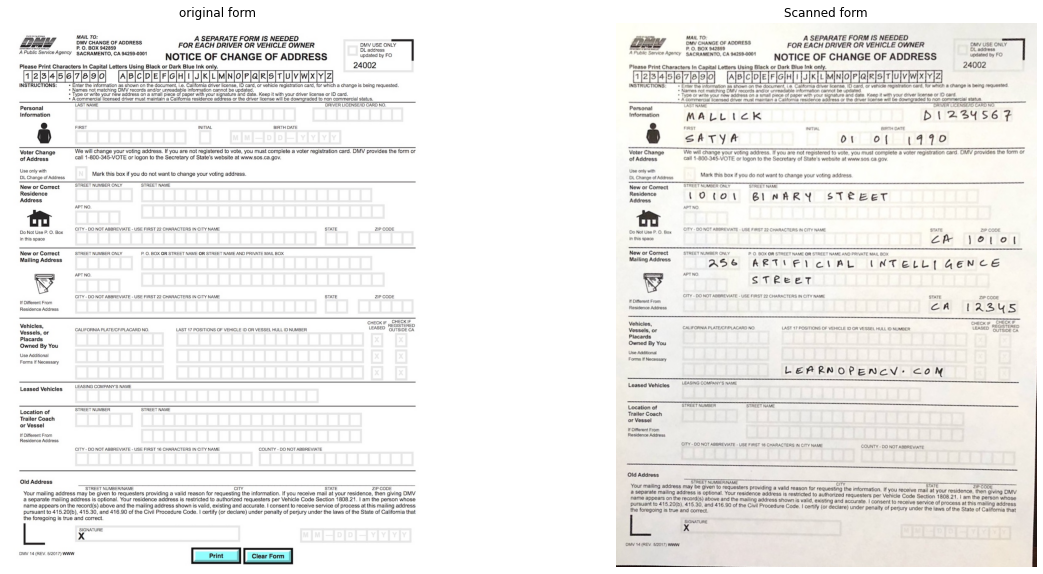

In [33]:
# Use homography to warp image
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h,(width, height))

# Display
plt.figure(figsize=[20,10]);
plt.subplot(121);plt.imshow(im1); plt.axis('off'); plt.title("original form")
plt.subplot(122);plt.imshow(im2_reg); plt.axis('off'); plt.title("Scanned form")